In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics  import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
def decimal_to_hms(time):
    seconds = int(time * 3600)
    return str(timedelta(seconds=seconds))

# 20200813 (Yeast 1)

check for seasonality

In [3]:
df13 = pd.read_csv('20200813Y1.csv')

In [4]:
df13 = df13.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df13 = df13.drop(['mean'], axis = 1)
df13 = df13.dropna()

In [5]:
df13 = df13[df13['mass']>0]

In [6]:
sdc = df13[['mass']].copy()

In [7]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 23)

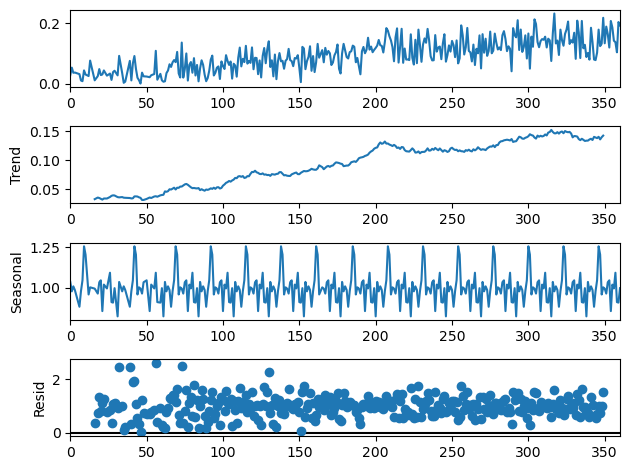

In [8]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecast

In [9]:
df13 = pd.read_csv('20200813Y1.csv')

In [10]:
df13 = df13.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df13 = df13.drop(['mean'], axis = 1)
df13 = df13.dropna()

In [11]:
df13['time'] = df13['time'].apply(decimal_to_hms)

In [12]:
df13.set_index('time', inplace=True)

In [13]:
train_size = int(len(df13) * 0.80)
train = df13[:train_size]
test = df13[train_size:]

In [14]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [15]:
# Create the model
model = ExponentialSmoothing(train, seasonal_periods=23, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [16]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [17]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.0028433123692126667, RMSE: 0.05332271907182404


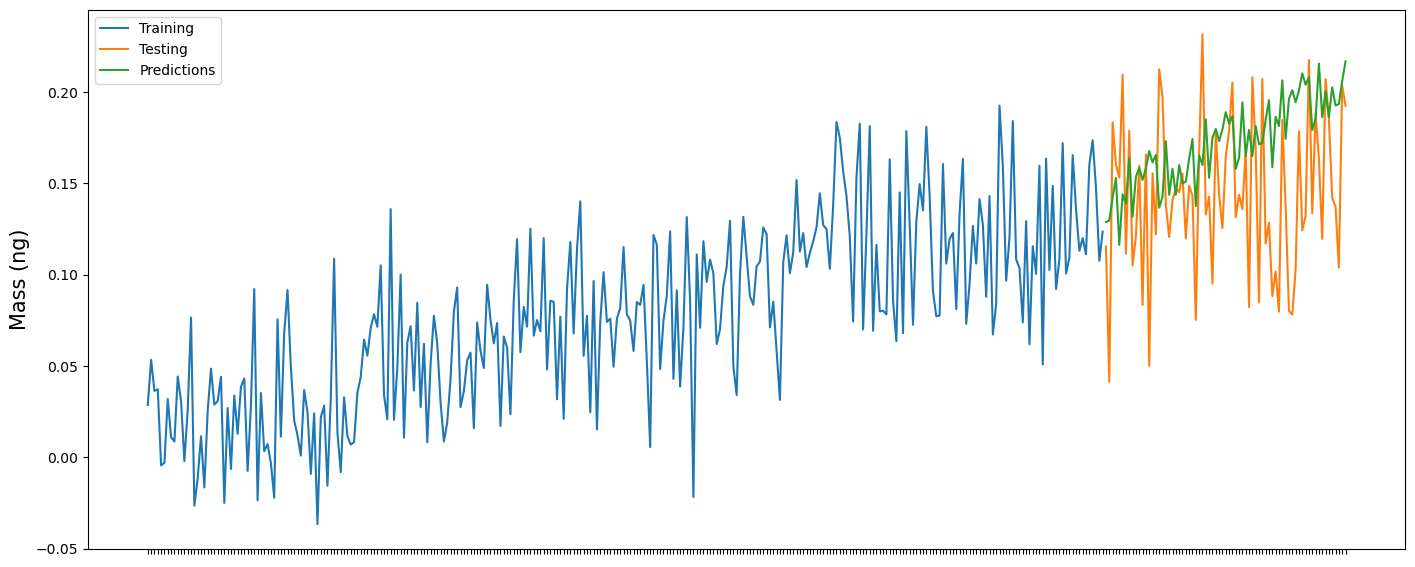

In [18]:
# Visualize the results
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [19]:
forecast = model_fit.forecast(steps=90)

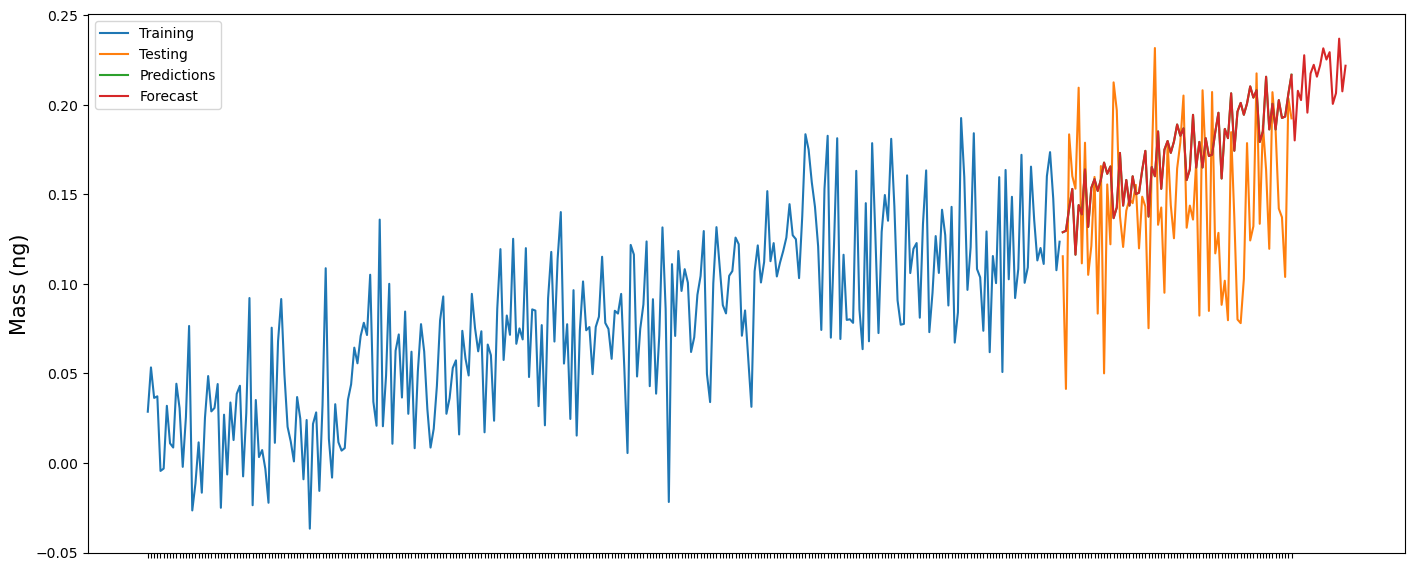

In [20]:
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [21]:
forecast

288    0.128774
289    0.129570
290    0.142147
291    0.152940
292    0.116247
         ...   
373    0.200414
374    0.206375
375    0.236834
376    0.207431
377    0.221727
Length: 90, dtype: float64

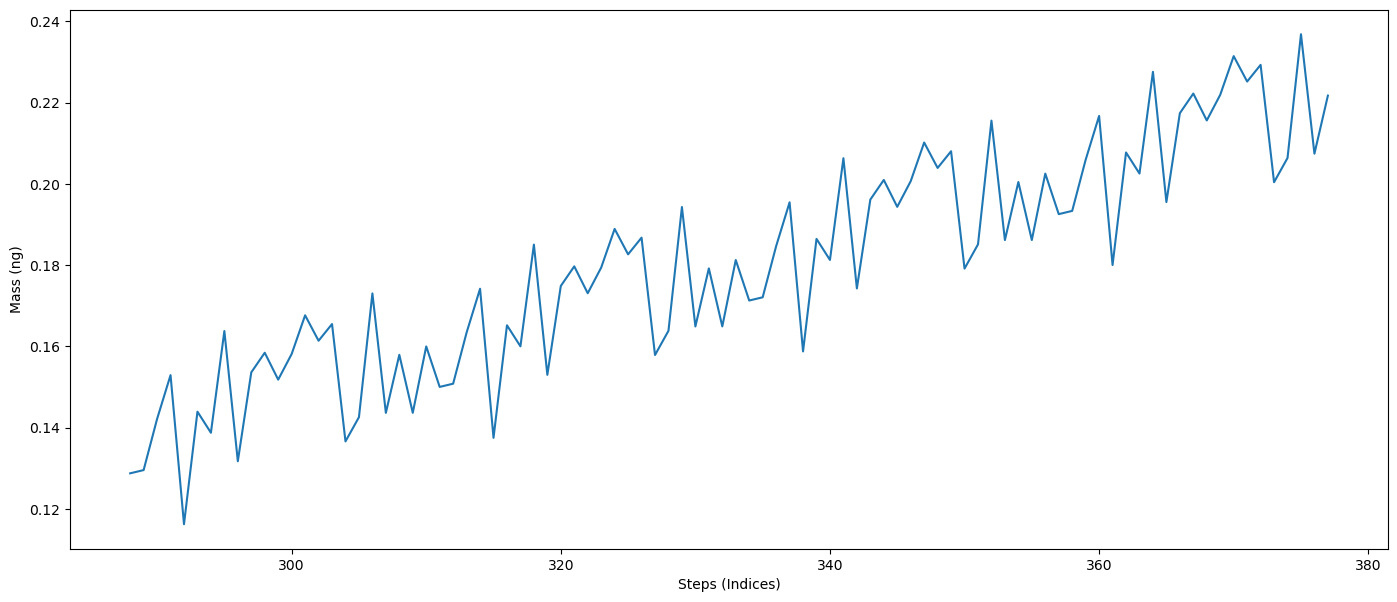

In [22]:
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

# 20200828

check for seasonality

In [23]:
df28 = pd.read_csv('20200828.csv')

In [24]:
df28 = df28.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df28 = df28.drop(['mean'], axis = 1)
df28 = df28.dropna()

In [25]:
df28 = df28[df28['mass']>0]

In [26]:
sdc = df28[['mass']].copy()

In [27]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 33)

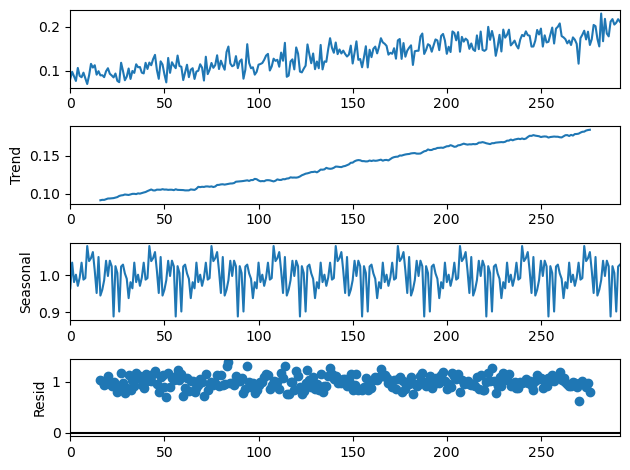

In [28]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecast

In [29]:
df28 = pd.read_csv('20200828.csv')

In [30]:
df28 = df28.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df28 = df28.drop(['mean'], axis = 1)
df28 = df28.dropna()

In [31]:
df28['time'] = df28['time'].apply(decimal_to_hms)

In [32]:
df28.set_index('time', inplace=True)

In [33]:
train_size = int(len(df28) * 0.85)
train = df28[:train_size]
test = df28[train_size:]

In [34]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [35]:
# Create and fit the model
model = ExponentialSmoothing(train, seasonal_periods=33, trend='add', seasonal='add')
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [36]:
# Make predictions for test 
predictions = model_fit.forecast(len(test))

In [37]:
# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.0006765538162268106, RMSE: 0.026010648131617378


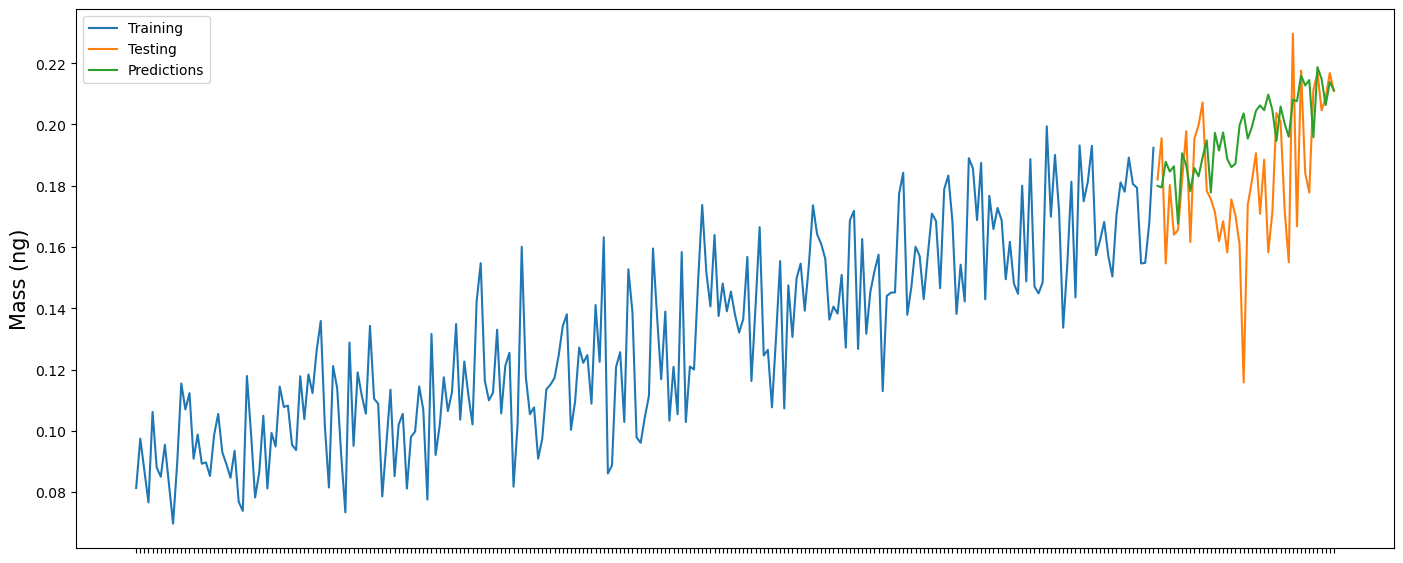

In [38]:
# Visualize 
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [39]:
forecast = model_fit.forecast(steps=60)
forecast

249    0.179960
250    0.179433
251    0.187833
252    0.184618
253    0.186363
254    0.167681
255    0.190577
256    0.186728
257    0.178228
258    0.185761
259    0.183039
260    0.189291
261    0.194807
262    0.177818
263    0.197261
264    0.191498
265    0.197406
266    0.188725
267    0.186085
268    0.187182
269    0.199701
270    0.203629
271    0.195384
272    0.199097
273    0.204461
274    0.206242
275    0.204671
276    0.209756
277    0.204735
278    0.194624
279    0.205883
280    0.200239
281    0.195991
282    0.208096
283    0.207570
284    0.215969
285    0.212755
286    0.214499
287    0.195818
288    0.218714
289    0.214865
290    0.206365
291    0.213898
292    0.211175
293    0.217428
294    0.222943
295    0.205955
296    0.225397
297    0.219634
298    0.225543
299    0.216862
300    0.214221
301    0.215318
302    0.227837
303    0.231765
304    0.223520
305    0.227234
306    0.232598
307    0.234378
308    0.232808
dtype: float64

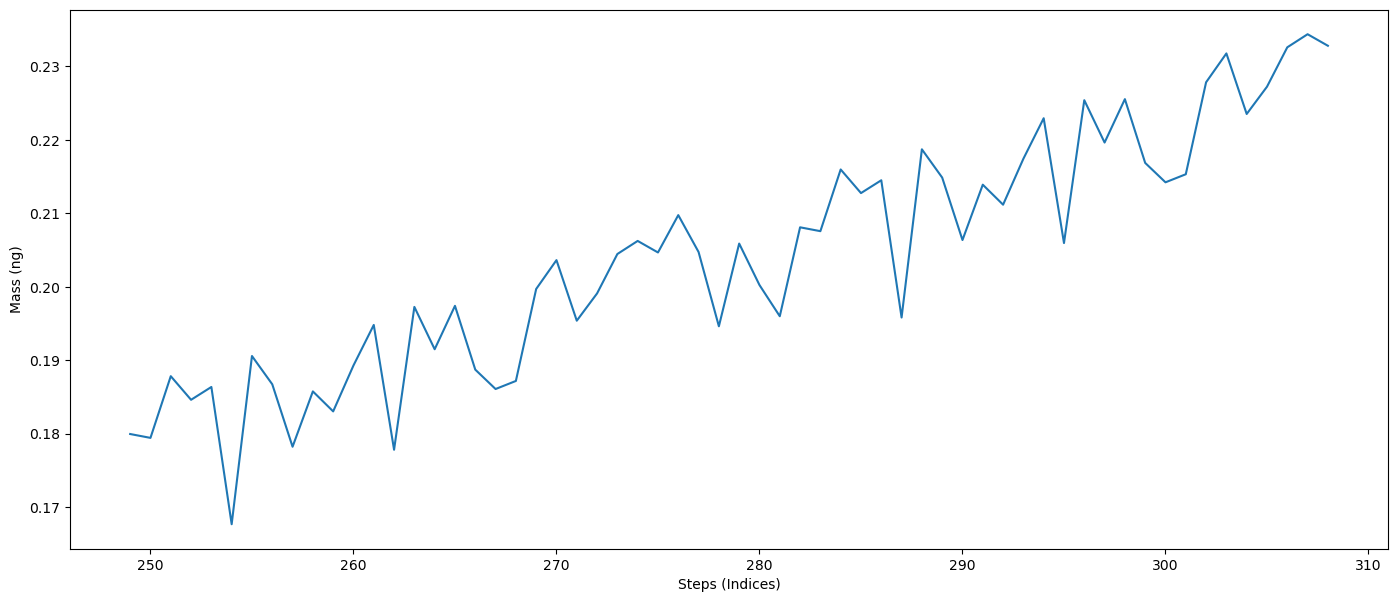

In [40]:
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

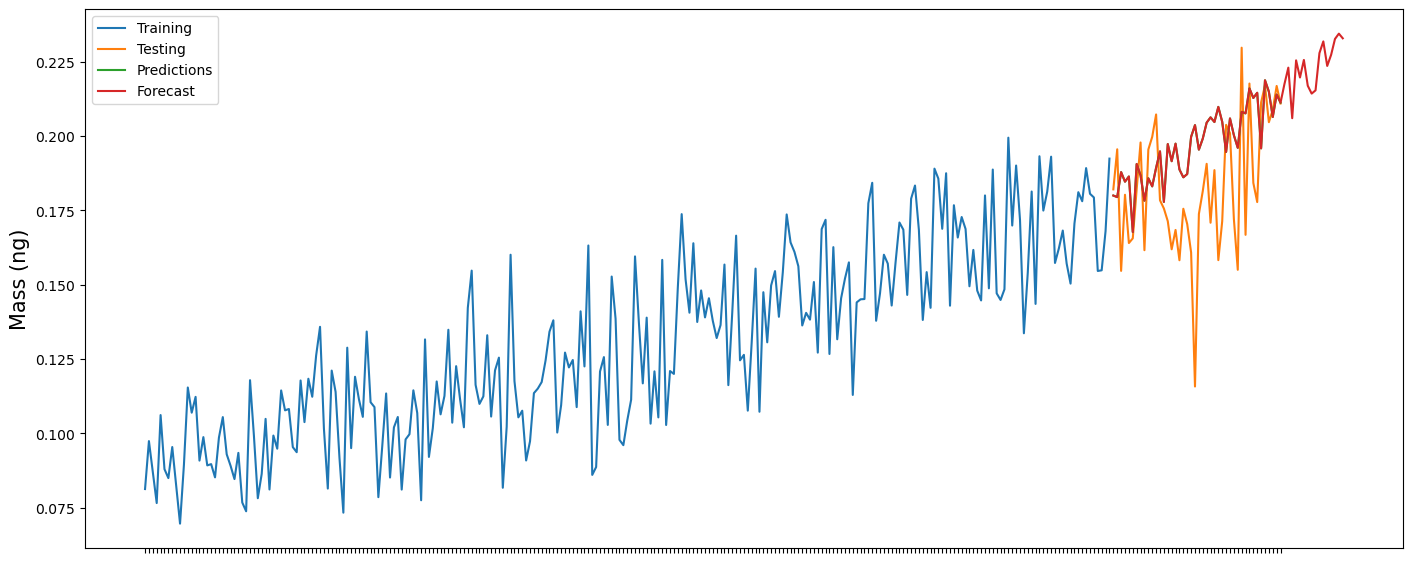

In [41]:
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

# 20200911 (Yeast 1)

Check for seasonality

In [42]:
df911 = pd.read_csv('20200911Y1.csv')

In [43]:
df911 = df911.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df911 = df911.drop(['mean'], axis = 1)
df911 = df911.dropna()

In [44]:
df911 = df911[df911['mass']>0]

In [45]:
sdc = df911[['mass']].copy()

In [46]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 25)

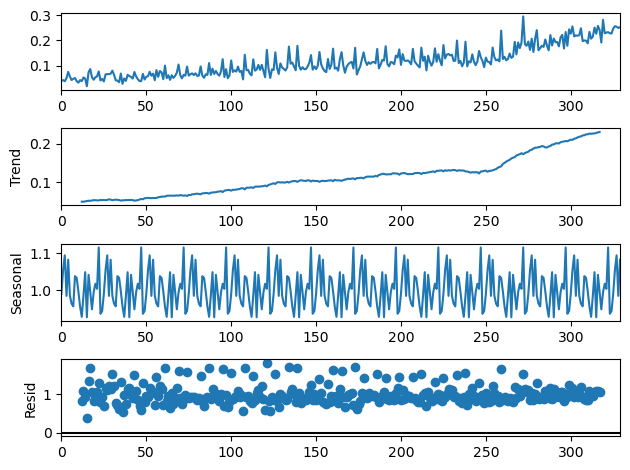

In [47]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecast

In [48]:
df911 = pd.read_csv('20200911Y1.csv')

In [49]:
df911 = df911.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df911 = df911.drop(['mean'], axis = 1)
df911 = df911.dropna()

In [50]:
df911['time'] = df911['time'].apply(decimal_to_hms)

In [51]:
df911.set_index('time', inplace=True)

In [52]:
train_size = int(len(df911) * 0.85)
train = df911[:train_size]
test = df911[train_size:]

In [53]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [54]:
# Create the model
model = ExponentialSmoothing(train, seasonal_periods=25, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

In [55]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [56]:
# Evaluate
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 0.000724914761185525, RMSE: 0.02692424114409773


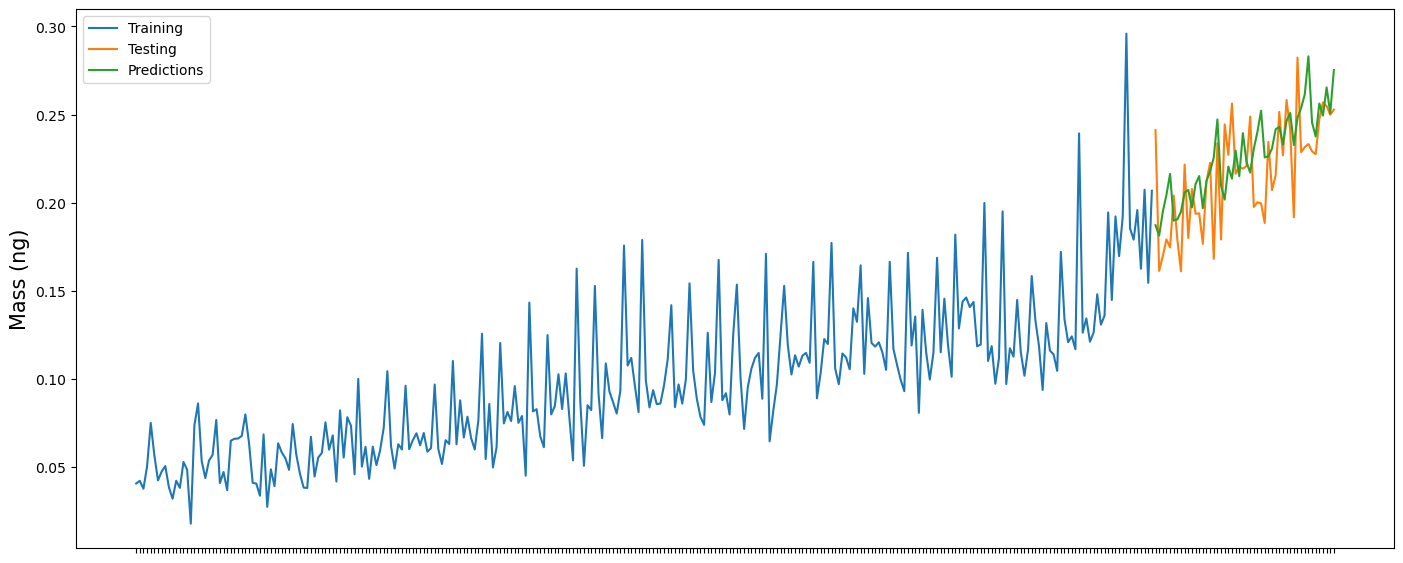

In [57]:
# Visualize
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [58]:
forecast = model_fit.forecast(steps=67)
forecast

280    0.187234
281    0.181312
282    0.194789
283    0.204433
284    0.216368
         ...   
342    0.286759
343    0.268535
344    0.283917
345    0.289615
346    0.297225
Length: 67, dtype: float64

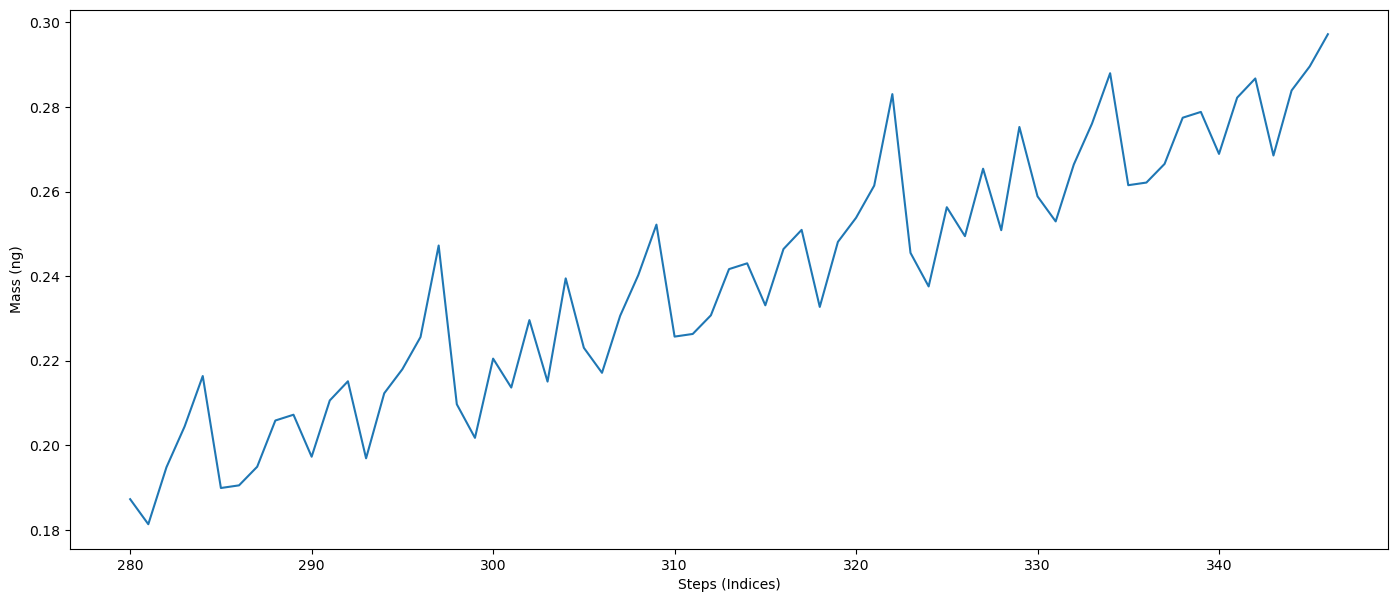

In [59]:
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

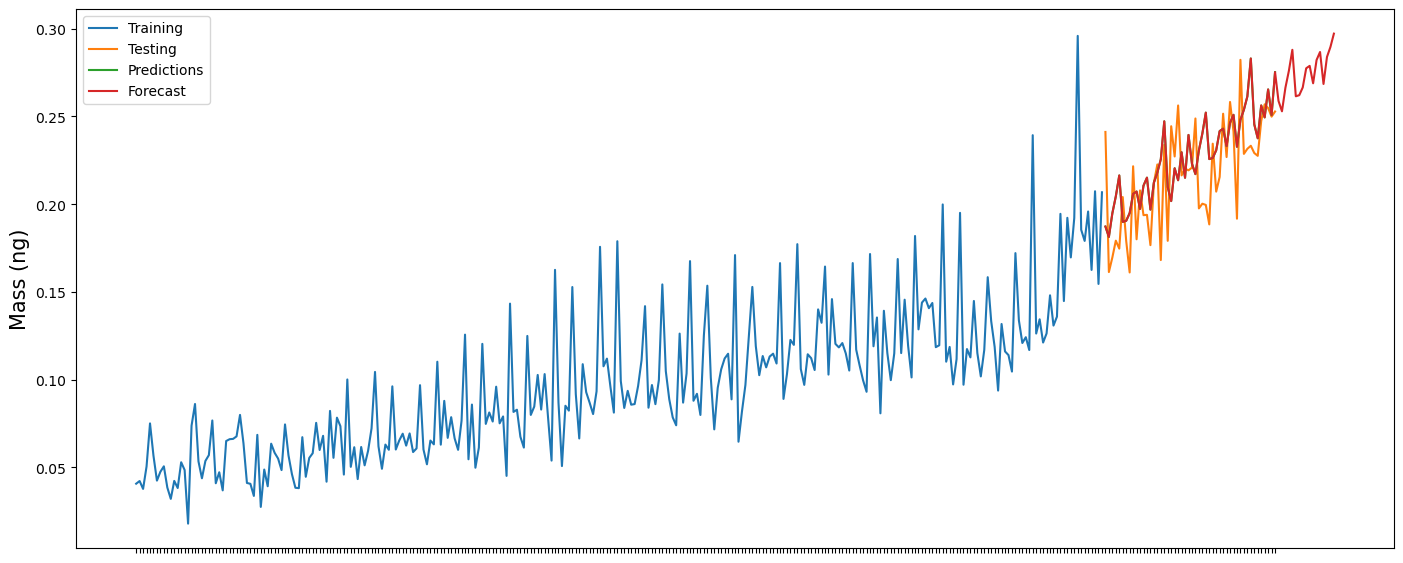

In [60]:
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

# 20201007

Check for seasonality

In [61]:
df007 = pd.read_csv('20201007.csv')

In [62]:
df007 = df007.dropna()

In [63]:
df007 = df007[df007['mass']>0]

In [64]:
sdc = df007[['mass']].copy()

In [65]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 27)

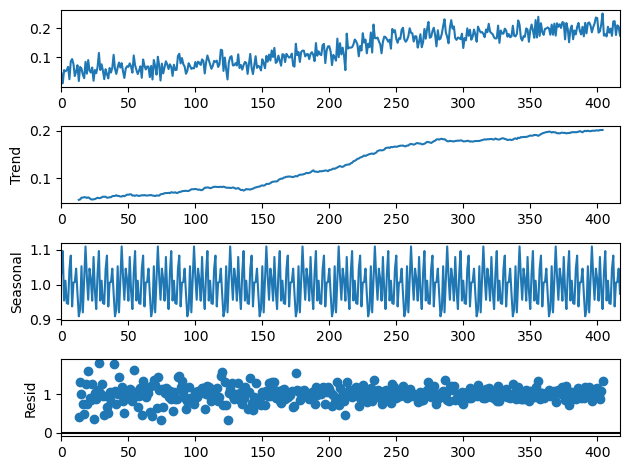

In [66]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecast

In [67]:
df007 = pd.read_csv('20201007.csv')

In [68]:
df007 = df007.dropna()

In [69]:
df007['time'] = df007['time'].apply(decimal_to_hms)

In [70]:
df007.set_index('time', inplace=True)

In [71]:
train_size = int(len(df007) * 0.87)
train = df007[:train_size]
test = df007[train_size:]

In [72]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [73]:
# Create the model
model = ExponentialSmoothing(train, seasonal_periods=27, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [74]:
# Make predictions 
predictions = model_fit.forecast(len(test))

In [75]:
# Evaluate 
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 0.0004499045312476176, RMSE: 0.021210953096162784


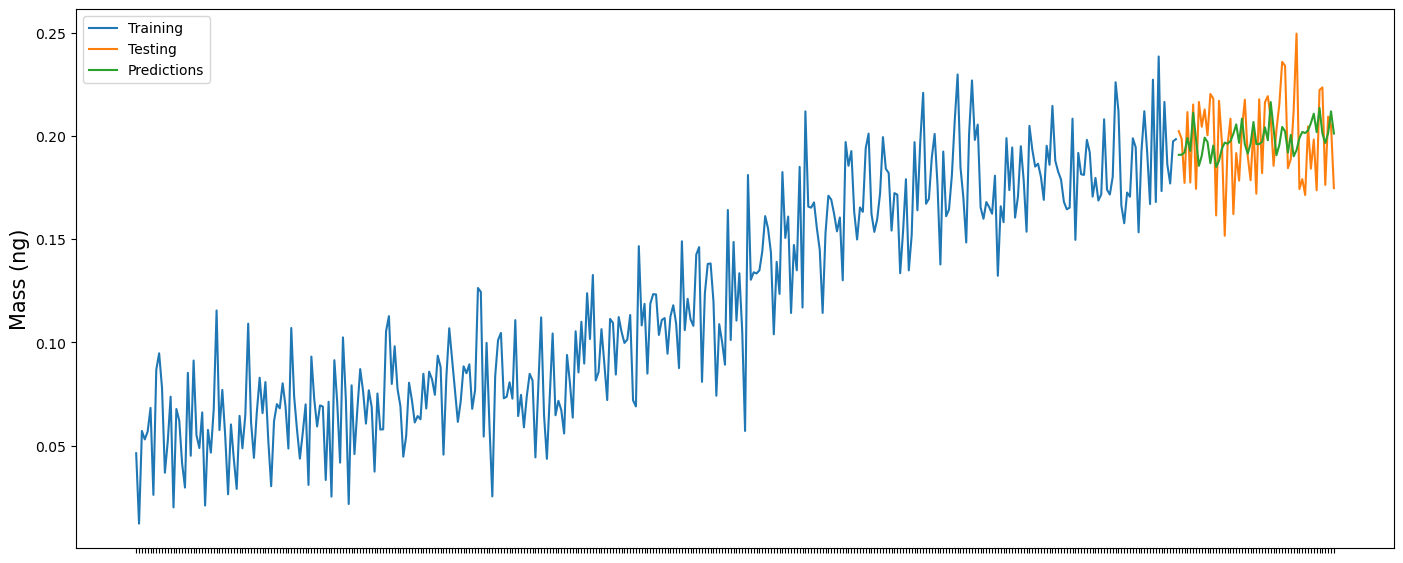

In [76]:
# Visualize 
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [77]:
forecast = model_fit.forecast(steps=70)
forecast

363    0.190796
364    0.190876
365    0.191930
366    0.198957
367    0.192715
         ...   
428    0.197086
429    0.205638
430    0.195256
431    0.198250
432    0.204114
Length: 70, dtype: float64

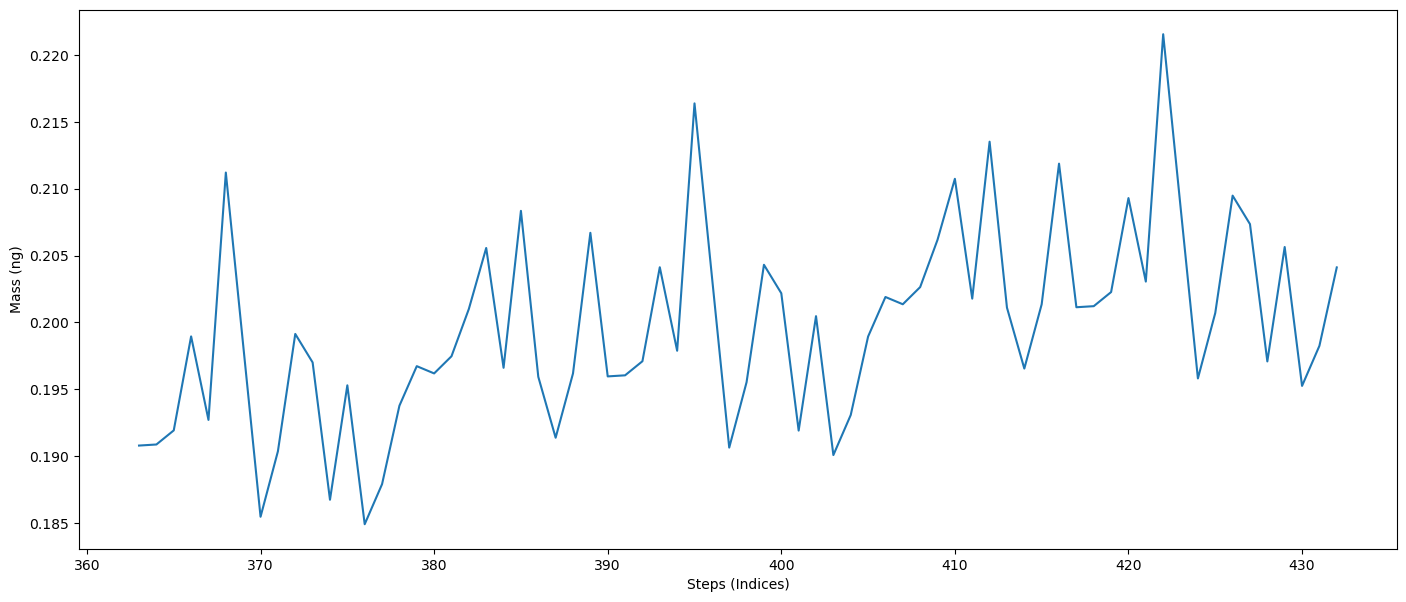

In [78]:
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

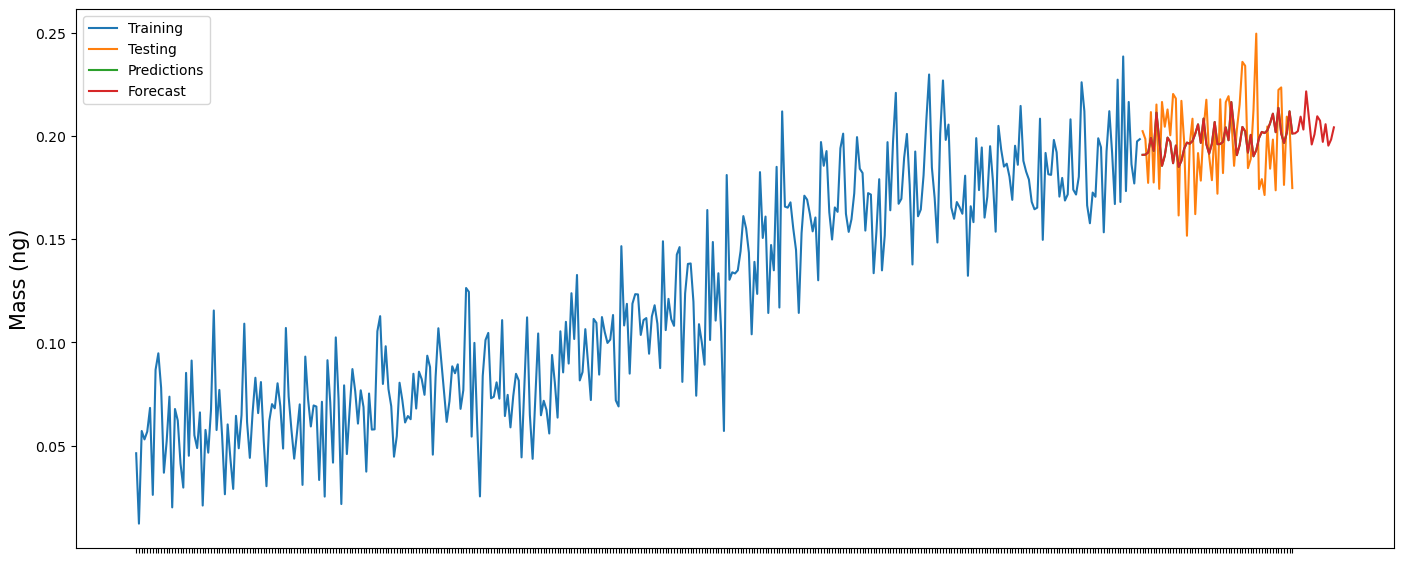

In [79]:
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

# 20201008 (Yeast 2)

Check for seasonality

In [80]:
df008Y2 = pd.read_csv('20201008Y2.csv')

In [81]:
df008Y2 = df008Y2.dropna()

In [82]:
df008Y2 = df008Y2[df008Y2['mass']>0]

In [83]:
sdc = df008Y2[['mass']].copy()

In [84]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 24)

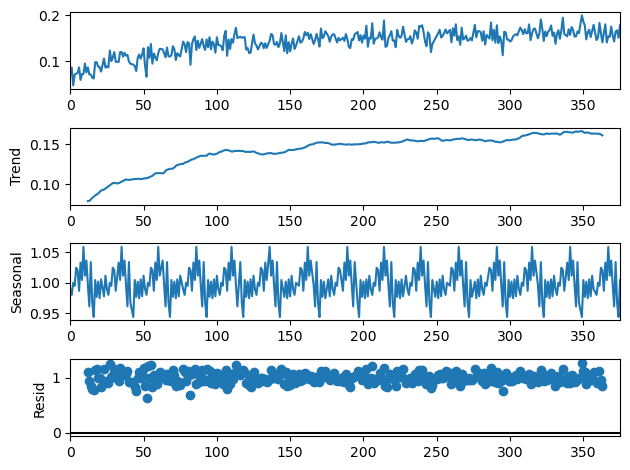

In [85]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecasting

In [86]:
df008Y2 = pd.read_csv('20201008Y2.csv')

In [87]:
df008Y2 = df008Y2.dropna()

In [88]:
df008Y2['time'] = df008Y2['time'].apply(decimal_to_hms)

In [89]:
df008Y2.set_index('time', inplace=True)

In [90]:
train_size = int(len(df008Y2) * 0.87)
train = df008Y2[:train_size]
test = df008Y2[train_size:]

In [91]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [92]:
# Create the model
model = ExponentialSmoothing(train, seasonal_periods=24, trend='add', seasonal='add')

# Fit the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [93]:
# Make predictions for the test data
predictions = model_fit.forecast(len(test))

In [94]:
# Evaluate 
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.00022292567140638569, RMSE: 0.014930695610264971


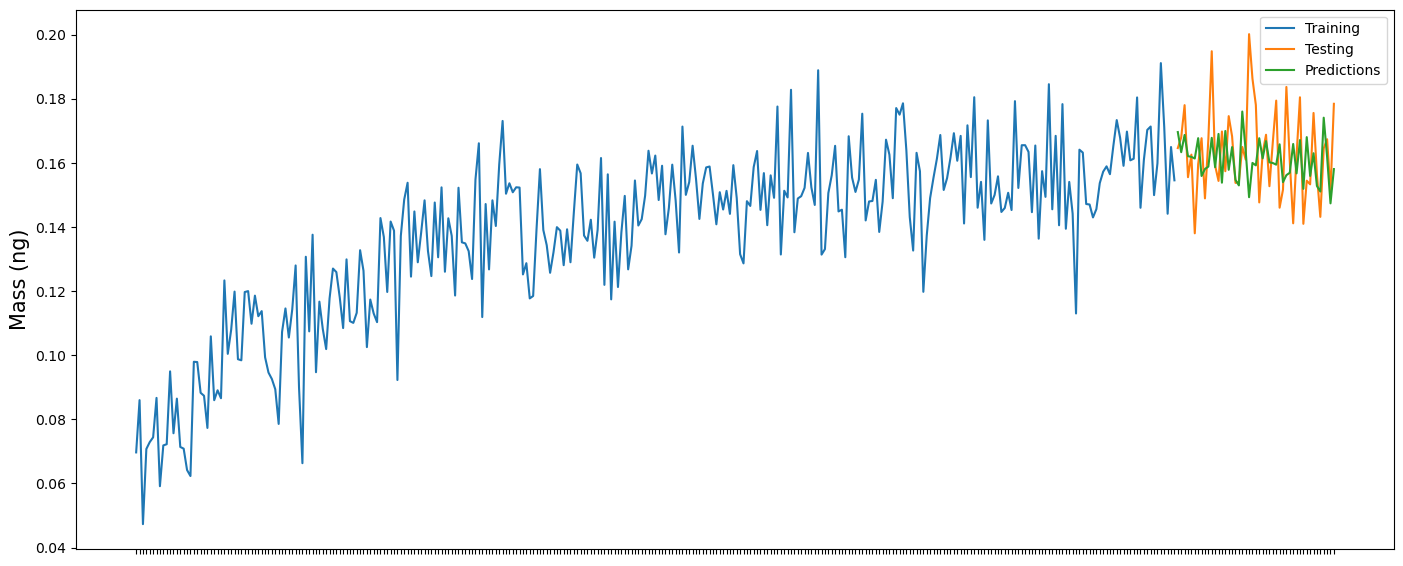

In [95]:
# Visualize 
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [96]:
forecast = model_fit.forecast(steps=65)
forecast

307    0.169573
308    0.163289
309    0.168678
310    0.162044
311    0.161836
         ...   
367    0.165158
368    0.149947
369    0.166075
370    0.153970
371    0.161051
Length: 65, dtype: float64

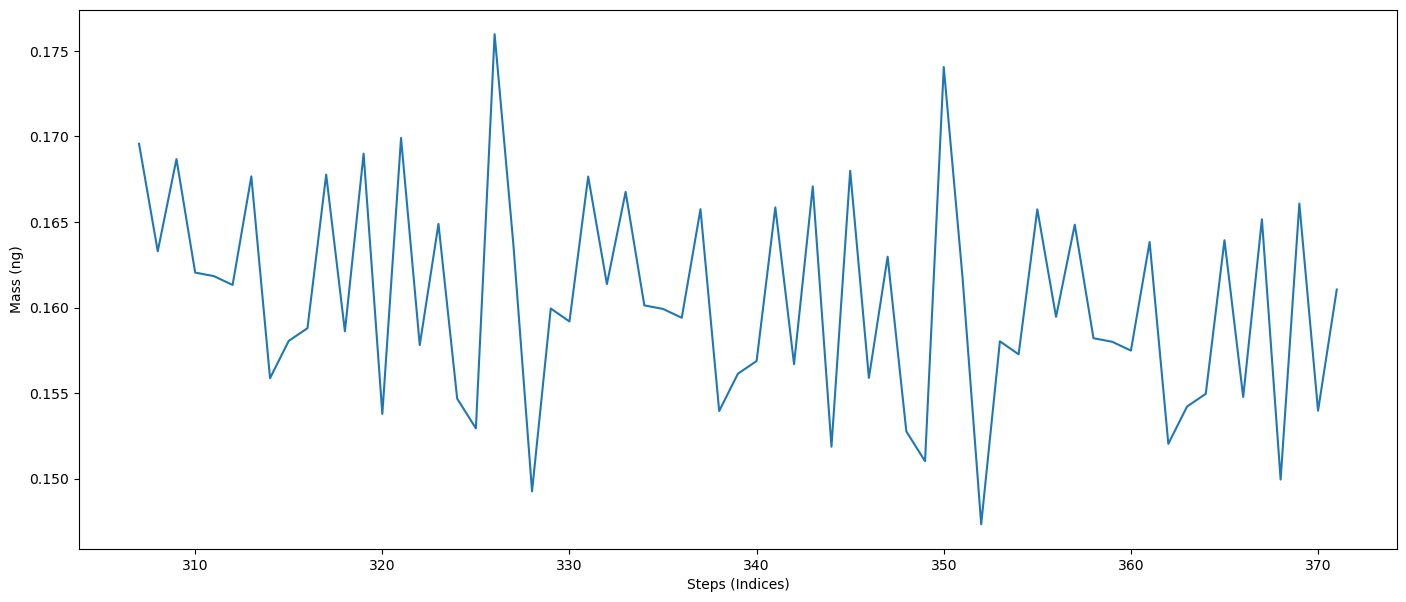

In [97]:
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

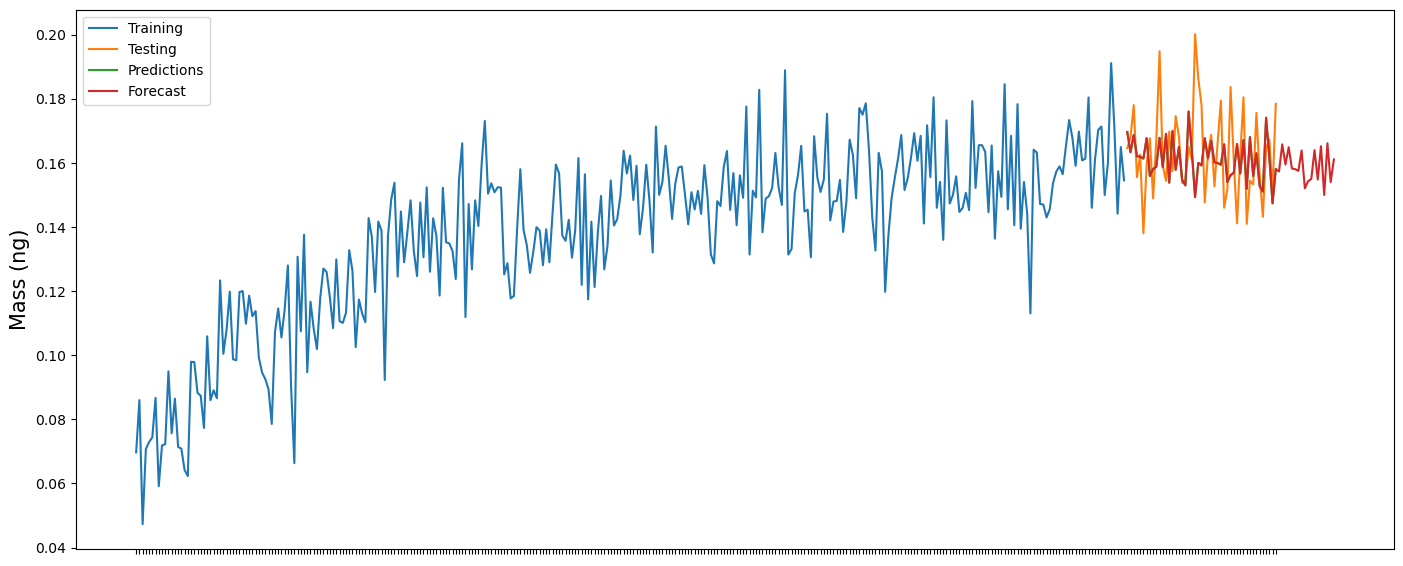

In [98]:
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

# 20201009 (Yeast 1)

Check for seasonality

In [99]:
df009Y1 = pd.read_csv('20201009Y1.csv')

In [100]:
df009Y1 = df009Y1.dropna()

In [101]:
df009Y1 = df009Y1[df009Y1['mass']>0]

In [102]:
sdc = df009Y1[['mass']].copy()

In [103]:
dc_result = seasonal_decompose(sdc, model="multiplicative", period = 29)

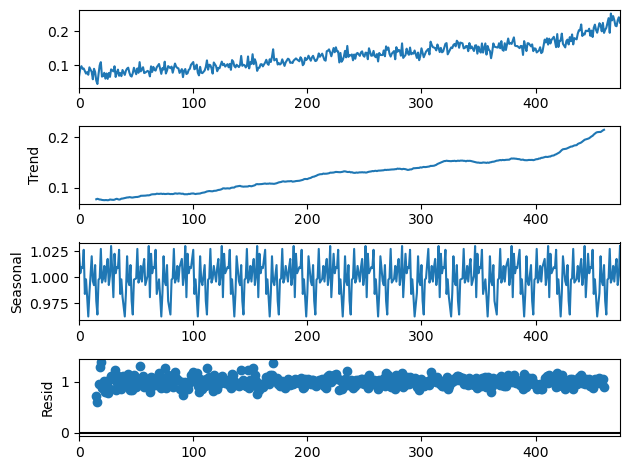

In [104]:
trend = dc_result.trend
seasonal = dc_result.seasonal
residual = dc_result.resid

dc_result.plot();

Forecasting

In [105]:
df009Y1 = pd.read_csv('20201009Y1.csv')

In [106]:
df009Y1 = df009Y1.dropna()

In [107]:
df009Y1['time'] = df009Y1['time'].apply(decimal_to_hms)

In [108]:
df009Y1.set_index('time', inplace=True)

In [109]:
train_size = int(len(df009Y1) * 0.8)
train = df009Y1[:train_size]
test = df009Y1[train_size:]

In [110]:
alpha = 0.3
beta = 0.1
gamma = 0.2

In [111]:
# Creating the model
model = ExponentialSmoothing(train, seasonal_periods=29, trend='add', seasonal='add')

# Fitting the model to the training data
model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)


In [112]:
# Making predictions for the test data
predictions = model_fit.forecast(len(test))

In [113]:
# Evaluating the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 0.0005270800229431991, RMSE: 0.022958223427417008


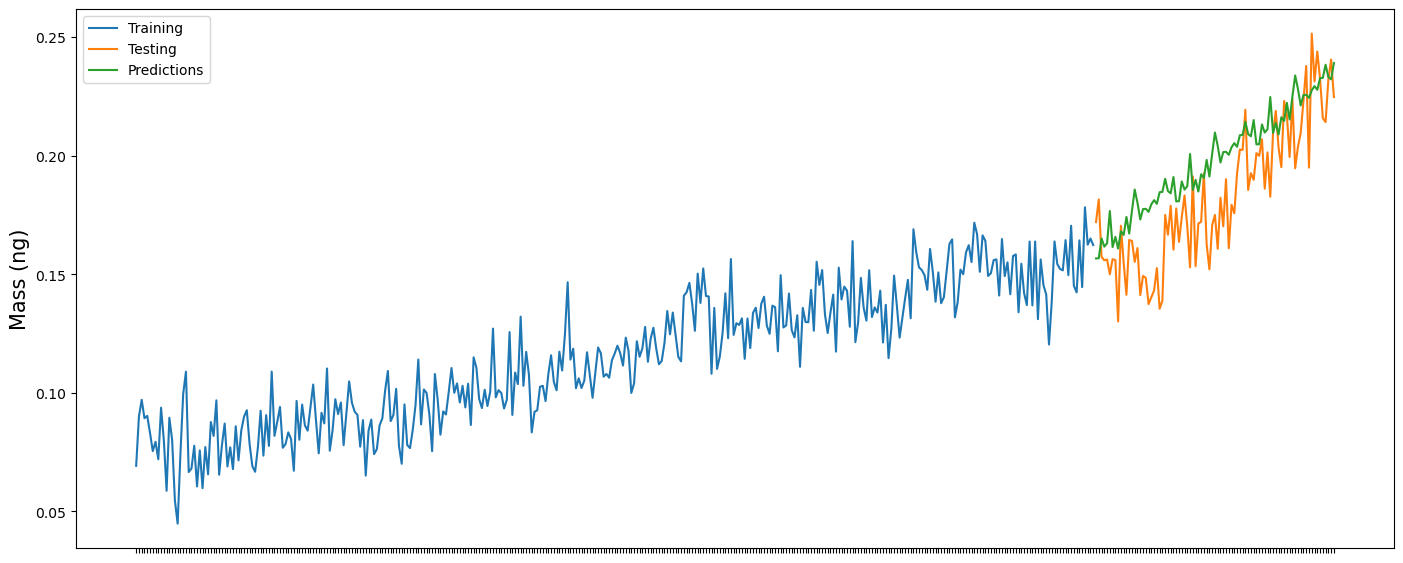

In [114]:
# Visualizing the results
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.gca().set_xticklabels([])
plt.legend()
plt.show()

In [115]:
forecast = model_fit.forecast(steps=100)
forecast

347    0.156633
348    0.156735
349    0.165060
350    0.161618
351    0.163046
         ...   
442    0.232908
443    0.240203
444    0.238638
445    0.246235
446    0.239239
Length: 100, dtype: float64

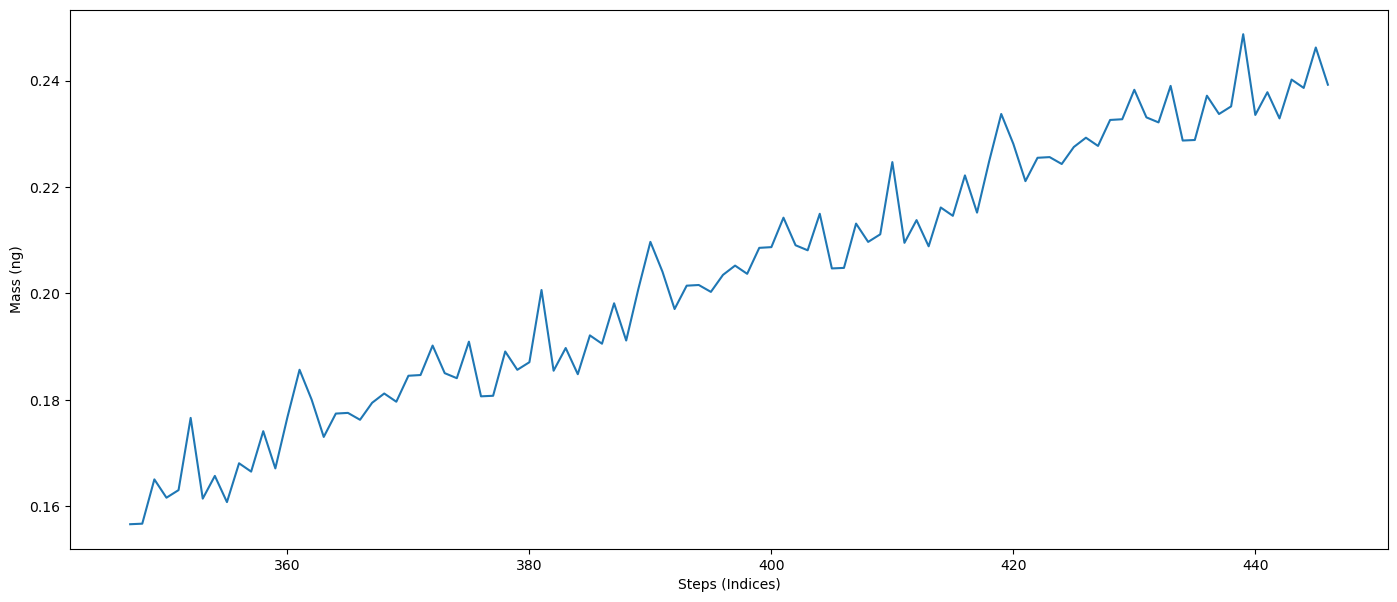

In [116]:
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(forecast)
plt.xlabel('Steps (Indices)', fontsize=10)
plt.ylabel('Mass (ng)', fontsize=10)
plt.show()

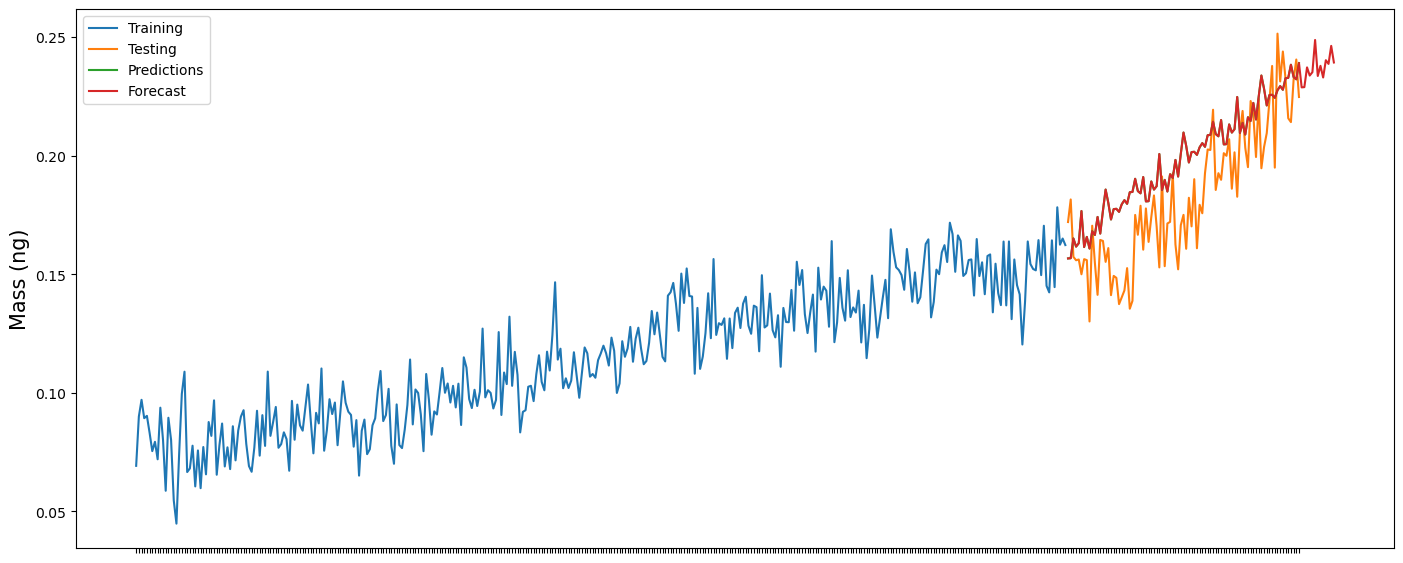

In [117]:
fig, ax = plt.subplots(figsize=(17,7)) 
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(predictions, label='Predictions')
plt.ylabel('Mass (ng)', fontsize=15)
plt.plot(range(len(train), len(train)+len(forecast)), forecast, label='Forecast')
plt.gca().set_xticklabels([])
plt.legend()
plt.show()